### MSDS 422 Sec.55 Summer 2020 
#### Joshua Sudderth

#### Assignment 5 - Digit Recognizer Kaggle Competition

In [1]:
# Initiate First Libraries

from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import os

In [2]:
# Import CSV
datapath = os.path
train = pd.read_csv("train.csv", thousands=',')
test = pd.read_csv("test.csv", thousands=',')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [3]:
#create target for training data set from 'labels' column
y = train['label'].reset_index(drop=True)

In [6]:
# check target 'y'
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [4]:
# drop target 'y' from training data set
train= train.drop(['label'], axis=1)

C:\Users\jlsud\anaconda3\envs\NWU2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


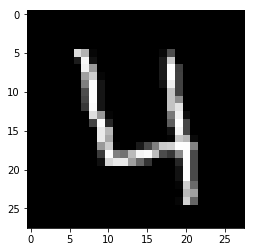

In [8]:
# Check data set with data point from first 5 entries
i=3
img=train.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')

In [9]:
# check test data frame
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [11]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

## Random Forest Classifier

In [5]:
# import libraries for random forest classifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import timeit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [62]:
trees = [5,10,15, 20, 40,80, 100,200,300, 400]

In [14]:
# set up the a function to calculate accuracy based on the number of estimators
def RF_clf_Trees():
    scores_RF_Trees = []
    for tree in trees:
        RF_clf = RandomForestClassifier(n_estimators = tree, bootstrap = True, random_state =42, 
                                       max_features = 'sqrt', n_jobs = -1)
        RF_scores = cross_val_score(RF_clf, train, y, scoring = "accuracy", cv=5)
 
        RF_accuracy_score = RF_scores.mean()
        
        scores_RF_Trees.append([tree, RF_accuracy_score])
        
    
    return scores_RF_Trees

In [15]:
# Define a function to plot accuracy results

def plotRF_Accuracy_Trees(data):
    
    data = pd.DataFrame(data, columns = ['Trees', 'Accuracy'])
    fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
 
    sns.barplot(data.Trees, data.Accuracy, ax=axarr[0],  palette = 'coolwarm').set_title('Cross Validation - Trees and Accuracy')
    

    sns.lineplot(x='Trees', y='Accuracy', data = data, ax=axarr[1], markers = True).set_title("Cross Validation - Trees and Accuracy")
    
    display(plt.show())
    #display(data)



Random Forest Cross Validation on Trees and with max features = sqrt


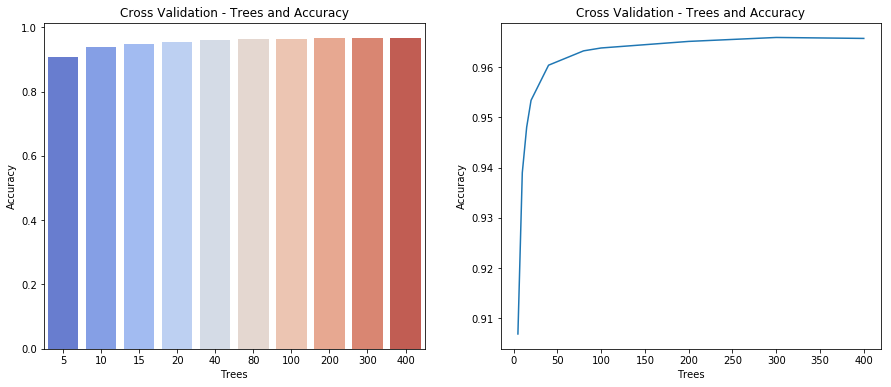

None

Cross Validation Completed.... Runtime = 162.40558919999998


In [16]:
print('Random Forest Cross Validation on Trees and with max features = sqrt')
start = timeit.default_timer()

scores_RF_Trees = RF_clf_Trees()
RF_Trees_Results = plotRF_Accuracy_Trees(scores_RF_Trees)

stop = timeit.default_timer()

print('Cross Validation Completed.... Runtime = {}'.format(stop-start))


In [17]:
# First Random Forest Regression Submission

# Create the random forest model function
RF_clf_1st = RandomForestClassifier(n_estimators=300, bootstrap = True, random_state =42, 
                                       max_features = 'sqrt', n_jobs = -1)



In [18]:
#Train the model
RF_clf_model_1 = RF_clf_1st.fit(train, y)
stop = timeit.default_timer()
print('Training completed.... Runtime = {}'.format(stop-start))

Training completed.... Runtime = 183.3410061


In [19]:
# Run trained model on test data
print('Random Forest prediction on test started....')
start = timeit.default_timer()

RF_pred = RF_clf_model_1.predict(test)

stop = timeit.default_timer()

print('Prediction completed.... Runtime = {}'.format(stop-start))

Random Forest prediction on test started....
Prediction completed.... Runtime = 0.7248442000000068


In [ ]:
# Format submission
np.savetxt('submission_RF_1.csv', 
           np.c_[range(1,len(test)+1),RF_pred], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

### Part 2 - PCA 

In [25]:
merged = pd.concat([train, test]).reset_index(drop=True)

In [6]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA(n_components = 0.95)


In [ ]:
# components = [1,2,3,4,5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

In [92]:
# Perform PCA decomp

print('PCA decomp started....')
start = timeit.default_timer()

pca.fit(train)

stop = timeit.default_timer()
print('PCA decomp completed    Runtime = {}'.format(stop-start))

PCA decomp started....
PCA decomp completed    Runtime = 3.3397133999988


In [93]:
# create dataframe of cumulative variance explained
cumsum = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_), columns = ['ExpVariance'])

In [94]:
# create list of components
comps = list(range(1,len(cumsum)+1))

In [95]:
variance = pd.DataFrame(comps, columns = ['Components'])

In [96]:
variance['ExpVariance']= cumsum

Text(0.5, 1.0, 'PCA - Cumulative Explained Variance vs Components')

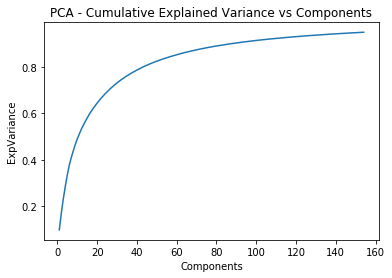

In [97]:
 sns.lineplot(x='Components', y='ExpVariance', data = variance,  markers = True).set_title("PCA - Cumulative Explained Variance vs Components")

In [98]:
variance.tail(10)

,Components,ExpVariance
144,145,0.946202
145,146,0.946695
146,147,0.947179
147,148,0.947656
148,149,0.948131
149,150,0.948598
150,151,0.949064
151,152,0.949525
152,153,0.949981
153,154,0.950433


#### Now fit train with 154 components and transform train and test

In [104]:
# Fit PCA with 154 components to the training data

pca = PCA(n_components = 154).fit(merged)

In [100]:
# transform train and test data sets

train_pca = pca.transform(train)
test_pca = pca.transform(test)

In [105]:
# set up the a function to calculate accuracy based on the number of estimators
def RF_clf_Trees_pca():
    scores_RF_Trees_pca = []
    for tree in trees:
        RF_clf = RandomForestClassifier(n_estimators = tree, bootstrap = True, random_state =42, 
                                       max_features = 'sqrt', n_jobs = -1)
        RF_scores = cross_val_score(RF_clf, train_pca, y, scoring = "accuracy", cv=5)
 
        RF_accuracy_score = RF_scores.mean()
        
        scores_RF_Trees_pca.append([tree, RF_accuracy_score])
        
    
    return scores_RF_Trees_pca

In [106]:
# Define a function to plot accuracy results

def plotRF_Accuracy_Trees_pca(data):
    
    data = pd.DataFrame(data, columns = ['Trees', 'Accuracy'])
    fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
 
    sns.barplot(data.Trees, data.Accuracy, ax=axarr[0],  palette = 'coolwarm').set_title('Cross Validation - Trees and Accuracy PCA')
    

    sns.lineplot(x='Trees', y='Accuracy', data = data, ax=axarr[1], markers = True).set_title("Cross Validation - Trees and Accuracy PCA")
    
    display(plt.show())
    display(data)

Random Forest Cross Validation on Trees with PCA and max features = sqrt


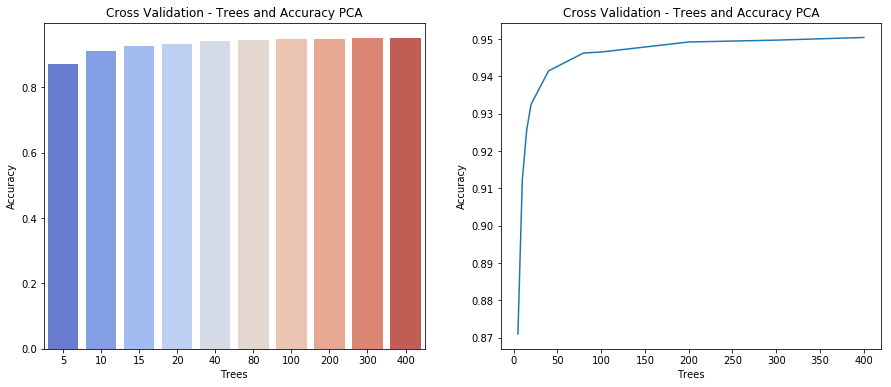

None

,Trees,Accuracy
0,5,0.870977
1,10,0.912168
2,15,0.925572
3,20,0.932525
4,40,0.941501
5,80,0.946286
6,100,0.946548
7,200,0.949238
8,300,0.949738
9,400,0.950453


Cross Validation Completed     Runtime = 126.99669580000045


In [107]:
print('Random Forest Cross Validation on Trees with PCA and max features = sqrt')
start = timeit.default_timer()

scores_RF_Trees_pca = RF_clf_Trees_pca()
RF_Trees_Results_pca = plotRF_Accuracy_Trees_pca(scores_RF_Trees_pca)

stop = timeit.default_timer()

print('Cross Validation Completed     Runtime = {}'.format(stop-start))

### Create second Kaggle Submission

In [108]:
# Second Random Forest Regression Submission using PCA decomp on the data set

# Create the random forest model function
RF_clf_2nd = RandomForestClassifier(n_estimators=400, bootstrap = True, random_state =42, 
                                       max_features = 'sqrt', n_jobs = -1)

In [109]:
#Train the model
print('Random Forest prediction on train_pca started....')
start = timeit.default_timer()

RF_clf_model_2 = RF_clf_2nd.fit(train_pca, y)

stop = timeit.default_timer()
print('Training completed     Runtime = {}'.format(stop-start))

Random Forest prediction on train_pca started....
Training completed     Runtime = 10.01794770000015


In [111]:
# Run trained model on test data with PCA decomp
print('Random Forest prediction on test_pca started....')
start = timeit.default_timer()

RF_pred_2 = RF_clf_model_2.predict(test_pca)

stop = timeit.default_timer()
print('Prediction completed    Runtime = {}'.format(stop-start))

Random Forest prediction on test_pca started....
Prediction completed    Runtime = 0.5650153000005957


In [112]:
# Format submission
np.savetxt('submission_RF_PCA_merged.csv', 
           np.c_[range(1,len(test_pca)+1),RF_pred_2], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

### Create third Kaggle submission - Scale data

In [23]:
from sklearn.preprocessing import StandardScaler

In [26]:
# Scale the data with standard scaler to ensure mean zero and std dev of 1
scaler = StandardScaler()
merged_scld = scaler.fit_transform(merged)

In [27]:
# Scale the training and test data
train_scld = scaler.fit_transform(train)
test_scld = scaler.fit_transform(test)

In [28]:
pca = PCA(n_components = 0.95)

In [29]:
# Perform PCA decomp

print('PCA decomp started....')
start = timeit.default_timer()

pca.fit(train_scld)

stop = timeit.default_timer()
print('PCA decomp completed    Runtime = {}'.format(stop-start))

PCA decomp started....
PCA decomp completed    Runtime = 3.0624195000000327


In [30]:
# create dataframe of cumulative variance explained
cumsum_scld = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_), columns = ['ExpVariance'])
# create list of components
comps_scld = list(range(1,len(cumsum_scld)+1))

In [31]:
variance_scld = pd.DataFrame(comps_scld, columns = ['Components'])

In [32]:
variance_scld['ExpVariance']= cumsum_scld

Text(0.5, 1.0, 'PCA - Cumulative Explained Variance vs Components')

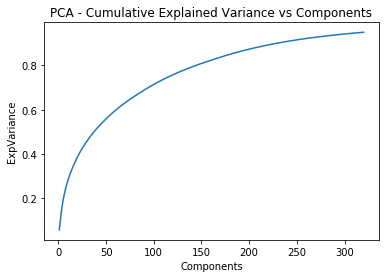

In [33]:
 sns.lineplot(x='Components', y='ExpVariance', data = variance_scld,  markers = True).set_title("PCA - Cumulative Explained Variance vs Components")

In [34]:
variance_scld.tail()

,Components,ExpVariance
315,316,0.948659
316,317,0.949030
317,318,0.949396
318,319,0.949758
319,320,0.950115


In [48]:
# Fit PCA with 154 components to the training data

pca = PCA(n_components = 320).fit(train_scld)

In [49]:
# transform train and test data sets

train_pca_scld = pca.transform(train_scld)
test_pca_scld = pca.transform(test_scld)

In [53]:
# set up the a function to calculate accuracy based on the number of estimators
def RF_clf_Trees_pca_scld():
    scores_RF_Trees_pca = []
    for tree in trees:
        RF_clf = RandomForestClassifier(n_estimators = tree, bootstrap = True, random_state =42, 
                                       max_features = 28, n_jobs = -1)
        RF_scores = cross_val_score(RF_clf, train_pca_scld, y, scoring = "accuracy", cv=5)
 
        RF_accuracy_score = RF_scores.mean()
        
        scores_RF_Trees_pca.append([tree, RF_accuracy_score])
        
    
    return scores_RF_Trees_pca

In [54]:
# Define a function to plot accuracy results

def plotRF_Accuracy_Trees_pca(data):
    
    data = pd.DataFrame(data, columns = ['Trees', 'Accuracy'])
    fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
 
    sns.barplot(data.Trees, data.Accuracy, ax=axarr[0],  palette = 'coolwarm').set_title('Cross Validation - Trees and Accuracy PCA')
    

    sns.lineplot(x='Trees', y='Accuracy', data = data, ax=axarr[1], markers = True).set_title("Cross Validation - Trees and Accuracy PCA")
    
    display(plt.show())
    display(data)

Random Forest Cross Validation on Trees with PCA and max features = 28


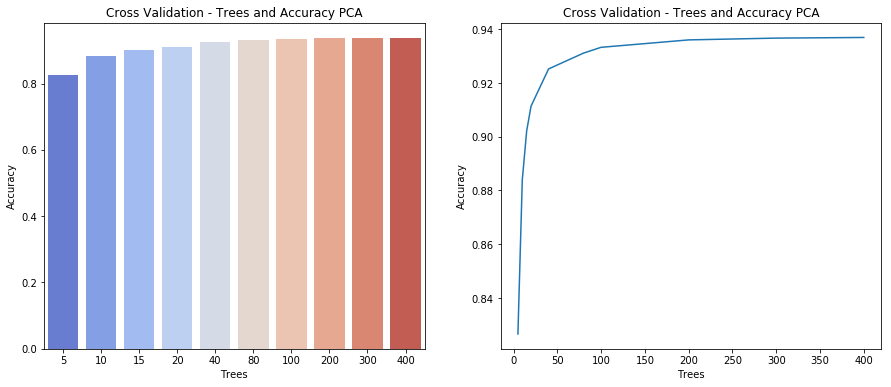

None

,Trees,Accuracy
0,5,0.826594
1,10,0.883952
2,15,0.902142
3,20,0.911380
4,40,0.925214
5,80,0.931119
6,100,0.933262
7,200,0.936024
8,300,0.936691
9,400,0.936929


Cross Validation Completed     Runtime = 453.9446760000001


In [56]:
print('Random Forest Cross Validation on Trees with PCA and max features = 28')
start = timeit.default_timer()

scores_RF_Trees_pca = RF_clf_Trees_pca_scld()
RF_Trees_Results_pca = plotRF_Accuracy_Trees_pca(scores_RF_Trees_pca)

stop = timeit.default_timer()

print('Cross Validation Completed     Runtime = {}'.format(stop-start))

### PCA unscaled and with 28 max features

In [58]:
pca = PCA(n_components = 0.95).fit(train)
train_pca = pca.transform(train)
test_pca = pca.transform(test)

In [59]:
# set up the a function to calculate accuracy based on the number of estimators
def RF_clf_Trees_pca_2():
    scores_RF_Trees_pca_2 = []
    for tree in trees:
        RF_clf = RandomForestClassifier(n_estimators = tree, bootstrap = True, random_state =42, 
                                       max_features = 28, n_jobs = -1)
        RF_scores = cross_val_score(RF_clf, train_pca, y, scoring = "accuracy", cv=5)
 
        RF_accuracy_score = RF_scores.mean()
        
        scores_RF_Trees_pca_2.append([tree, RF_accuracy_score])
        
    
    return scores_RF_Trees_pca

Random Forest Cross Validation on Trees with PCA (unscaled) and max features = 28


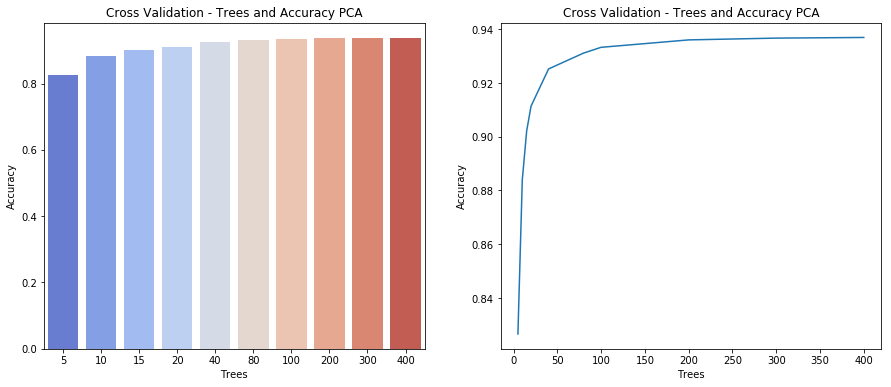

None

,Trees,Accuracy
0,5,0.826594
1,10,0.883952
2,15,0.902142
3,20,0.911380
4,40,0.925214
5,80,0.931119
6,100,0.933262
7,200,0.936024
8,300,0.936691
9,400,0.936929


Cross Validation Completed     Runtime = 475.58221200000025


In [61]:
print('Random Forest Cross Validation on Trees with PCA (unscaled) and max features = 28')
start = timeit.default_timer()

scores_RF_Trees_pca_2 = RF_clf_Trees_pca_2()
RF_Trees_Results_pca = plotRF_Accuracy_Trees_pca(scores_RF_Trees_pca_2)

stop = timeit.default_timer()

print('Cross Validation Completed     Runtime = {}'.format(stop-start))

#### KNN Classifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
KNN_clf = KNeighborsClassifier()

In [35]:
pca = PCA(n_components = 320).fit(train_scld)

In [36]:
train_pca = pca.transform(train_scld)
test_pca = pca.transform(test_scld)

In [37]:
neighbors = [1,2,5,10,25,50,100,150,200]

In [38]:
def KNN_clf_pca():
    scores_KNN = []
    for neighbor in neighbors:
        
        KNN_clf = KNeighborsClassifier(n_neighbors = neighbor, n_jobs = -1)
        
        KNN_scores = cross_val_score(KNN_clf, train_pca, y, scoring = "accuracy", cv=5)
 
        KNN_accuracy_score = KNN_scores.mean()
        
        scores_KNN.append([neighbor, KNN_accuracy_score])
        
    
    return scores_KNN

In [39]:
# Define a function to plot accuracy results

def plotKNN_Accuracy_Neighbors(data):
    
    data = pd.DataFrame(data, columns = ['Neighbors', 'Accuracy'])
    fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
 
    sns.barplot(data.Neighbors, data.Accuracy, ax=axarr[0],  palette = 'coolwarm').set_title('Cross Validation - Neighbors and Accuracy PCA')
    

    sns.lineplot(x='Neighbors', y='Accuracy', data = data, ax=axarr[1], markers = True).set_title("Cross Validation - Neighbors and Accuracy PCA")
    
    display(plt.show())
    display(data)

KNN Cross Validation on Neighbors with PCA and 154 components


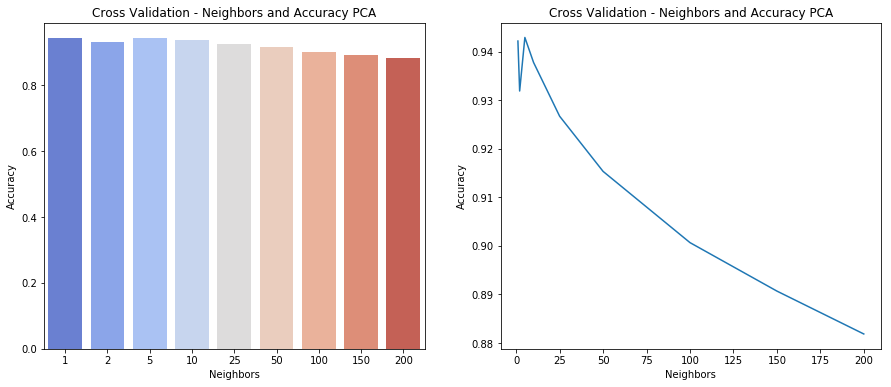

None

,Neighbors,Accuracy
0,1,0.942167
1,2,0.931882
2,5,0.942905
3,10,0.937762
4,25,0.926690
5,50,0.915333
6,100,0.900667
7,150,0.890690
8,200,0.881857


Cross Validation Completed     Runtime = 1127.6090617999998


In [40]:
print('KNN Cross Validation on Neighbors with PCA and 154 components')
start = timeit.default_timer()

scores_KNN = KNN_clf_pca()
KNN_Results_neighbors = plotKNN_Accuracy_Neighbors(scores_KNN)

stop = timeit.default_timer()

print('Cross Validation Completed     Runtime = {}'.format(stop-start))

In [15]:
def KNN_clf():
    scores_KNN = []
    for neighbor in neighbors:
        
        KNN_clf = KNeighborsClassifier(n_neighbors = neighbor, n_jobs = -1)
        
        KNN_scores = cross_val_score(KNN_clf, train, y, scoring = "accuracy", cv=5)
 
        KNN_accuracy_score = KNN_scores.mean()
        
        scores_KNN.append([neighbor, KNN_accuracy_score])
        
    
    return scores_KNN

KNN Cross Validation on Neighbors NO PCA


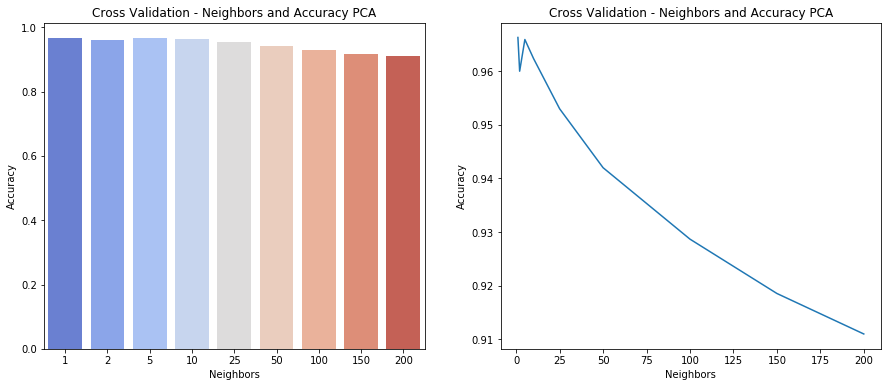

None

,Neighbors,Accuracy
0,1,0.966238
1,2,0.959953
2,5,0.965857
3,10,0.962309
4,25,0.952952
5,50,0.941976
6,100,0.928667
7,150,0.918548
8,200,0.911000


Cross Validation Completed     Runtime = 1906.8402846999998


In [16]:
print('KNN Cross Validation on Neighbors NO PCA')
start = timeit.default_timer()

scores_KNN = KNN_clf()
KNN_Results_neighbors = plotKNN_Accuracy_Neighbors(scores_KNN)

stop = timeit.default_timer()

print('Cross Validation Completed     Runtime = {}'.format(stop-start))

In [18]:
KNN_clf_submit = KNeighborsClassifier(n_neighbors = 2, n_jobs = -1)

In [19]:
#Train the model
print('K Nearest Neighbor prediction on train_pca started....')
start = timeit.default_timer()

KNN_clf_model = KNN_clf_submit.fit(train_pca, y)

stop = timeit.default_timer()
print('Training completed     Runtime = {}'.format(stop-start))

K Nearest Neighbor prediction on train_pca started....
Training completed     Runtime = 0.27025610000055167


In [20]:
# Run trained model on test data with PCA decomp
print('KNN prediction on test_pca started....')
start = timeit.default_timer()

KNN_PCA_pred = KNN_clf_model.predict(test_pca)

stop = timeit.default_timer()
print('Prediction completed    Runtime = {}'.format(stop-start))

KNN prediction on test_pca started....
Prediction completed    Runtime = 26.50596029999997


In [21]:
# Format submission
np.savetxt('submission_KNN_PCA.csv', 
           np.c_[range(1,len(test_pca)+1),KNN_PCA_pred], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

### RANDOM FOREST WITH ACCURACY ON PCA COMPONENTS

In [89]:
components = [30,35,40,45,50,55,60,80,100,150]

In [81]:
# trees_2 = [200,250,300]

In [86]:
# set up the a function to calculate accuracy based on the number of PCA components
def RF_clf_pca():
    scores_RF_pca = []
    for comp in components:
        pca = PCA(n_components = comp).fit(train)
        
        train_pca = pca.transform(train)
        
        RF_clf = RandomForestClassifier(n_estimators = 300, bootstrap = False, random_state =42, 
                                       max_features = 'sqrt', n_jobs = -1)
        RF_scores = cross_val_score(RF_clf, train_pca, y, scoring = "accuracy", cv=5)
 
        RF_accuracy_score = RF_scores.mean()
        
        scores_RF_pca.append([comp, RF_accuracy_score])
        
    
    return scores_RF_pca

In [87]:
# Define a function to plot accuracy results

def plotRF_Accuracy_comps_pca(data):
    
    data = pd.DataFrame(data, columns = ['Components', 'Accuracy'])
    fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
 
    sns.barplot(data.Components, data.Accuracy, ax=axarr[0],  palette = 'coolwarm').set_title('Cross Validation - Trees and Accuracy PCA')
    

    sns.lineplot(x='Components', y='Accuracy', data = data, ax=axarr[1], markers = True).set_title("Cross Validation - Trees and Accuracy PCA")
    
    display(plt.show())
    display(data)

Random Forest Cross Validation on PCA components and max features = sqrt


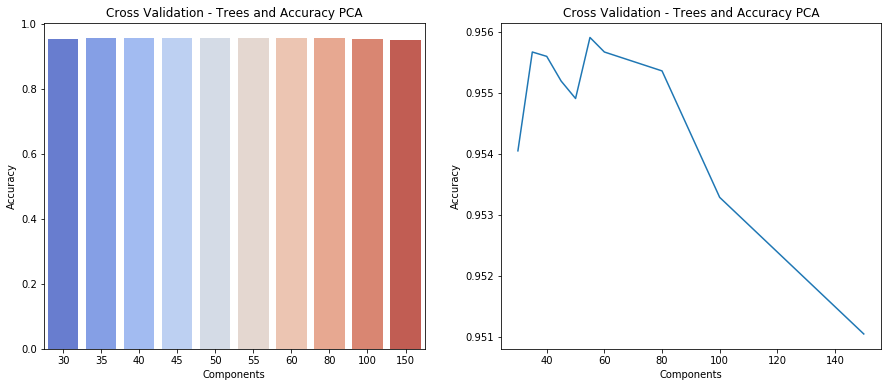

None

,Components,Accuracy
0,30,0.954048
1,35,0.955667
2,40,0.955595
3,45,0.955191
4,50,0.954905
5,55,0.955905
6,60,0.955667
7,80,0.955357
8,100,0.953286
9,150,0.951048


Cross Validation Completed     Runtime = 518.2723884000006


In [90]:
print('Random Forest Cross Validation on PCA components and max features = sqrt')
start = timeit.default_timer()

scores_RF_pca = RF_clf_pca()
RF_Results_pca = plotRF_Accuracy_comps_pca(scores_RF_pca)

stop = timeit.default_timer()

print('Cross Validation Completed     Runtime = {}'.format(stop-start))

In [113]:
pca = PCA(n_components = 55).fit(train)

In [114]:
# transform train and test data sets

train_pca = pca.transform(train)
test_pca = pca.transform(test)

In [115]:
# Second Random Forest Regression Submission using PCA decomp on the data set

# Create the random forest model function
RF_clf_3rd = RandomForestClassifier(n_estimators=400, bootstrap = False, random_state =42, 
                                       max_features = 'sqrt', n_jobs = -1)

In [116]:
#Train the model
print('Random Forest prediction on train_pca started....')
start = timeit.default_timer()

RF_clf_model_3 = RF_clf_3rd.fit(train_pca, y)

stop = timeit.default_timer()
print('Training completed     Runtime = {}'.format(stop-start))

Random Forest prediction on train_pca started....
Training completed     Runtime = 16.8881319000011


In [117]:
# Run trained model on test data with PCA decomp
print('Random Forest prediction on test_pca started....')
start = timeit.default_timer()

RF_pred_3 = RF_clf_model_3.predict(test_pca)

stop = timeit.default_timer()
print('Prediction completed    Runtime = {}'.format(stop-start))

Random Forest prediction on test_pca started....
Prediction completed    Runtime = 0.5709618000000773


In [118]:
# Format submission
np.savetxt('submission_RF_PCA_55.csv', 
           np.c_[range(1,len(test_pca)+1),RF_pred_3], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')